### Project Summary: Electric Vehicle Price Prediction
This project aims to predict the prices of electric vehicles using data from the "Electric Vehicle Data" dataset provided as part of a Kaggle competition. The dataset contains detailed information about Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) registered with the Washington State Department of Licensing (DOL).

Dataset can be found [here](https://drive.google.com/file/d/1kZ299dY3rKLvvnfTsaPtfrUbZb7k31of/view)

**The main goal is to develop a Support Vector Machine (SVM) model capable of predicting the price of an electric vehicle based on its make, model, and other relevant parameters.**

## Objectives:
- Perform exploratory data analysis to gain insights into the dataset.
- Handle missing data, corrupted values, and duplicate records to ensure data quality.
- Create a predictive model that answers the question:
**"This is my car's make and model. Along with a few other parameters, what price can this vehicle be bought or sold for?"**
  
## Key Steps:
1. Data Exploration:
- Analyze the structure and general information about the dataset.

2. Data Cleaning:
- Address missing or corrupted values.
- Remove duplicates to maintain dataset integrity.

3. Model Building:
- Use an SVM model to predict vehicle prices based on the features provided.

This project emphasizes data preprocessing, exploratory analysis, and machine learning modeling to address real-world challenges in electric vehicle pricing.

In [1]:
## Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Loading dataset with pandas
df = pd.read_csv(r"C:\Users\Pearl\Downloads\Electric_cars_dataset.csv")
df.head(3)

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50.0
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15.0
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18.0


In [3]:
## checking for data types for each feature in the dataset
df.dtypes

ID                                                    object
VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
ZIP Code                                             float64
Model Year                                           float64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility        

In [4]:
# checking for missing values
df.isnull().sum()

ID                                                     0
VIN (1-10)                                             0
County                                                 4
City                                                   9
State                                                 11
ZIP Code                                               6
Model Year                                             7
Make                                                   0
Model                                                 13
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 169
DOL Vehicle ID                                         0
Vehicle Location                                     509
Electric Utility                                     722
Expected Price ($1k)           

In [5]:
df["Model Year"].fillna(method="bfill", inplace=True)
df["Model"].fillna(method="bfill", inplace=True)
df["Electric Utility"].fillna(method="bfill", inplace=True)
df["Vehicle Location"].fillna(method="bfill", inplace=True)
df["Expected Price ($1k)"].fillna(df["Expected Price ($1k)"].median(), inplace=True)
df["State"].fillna(method="bfill", inplace=True)

In [6]:
df.isnull().sum()

ID                                                     0
VIN (1-10)                                             0
County                                                 4
City                                                   9
State                                                  0
ZIP Code                                               6
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 169
DOL Vehicle ID                                         0
Vehicle Location                                       0
Electric Utility                                       0
Expected Price ($1k)           

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
## Encoding low cardinality categorical columns with label Encoder.
encode = LabelEncoder()


In [9]:
def encoder(column):
    """This is a function to convert the categorical columns into numeric ones"""
    for col in column:
        df[col] = encode.fit_transform(df[col])
        
    return column

In [10]:
encoder(["Electric Utility", "Clean Alternative Fuel Vehicle (CAFV) Eligibility", "Electric Vehicle Type", "State"])

['Electric Utility',
 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
 'Electric Vehicle Type',
 'State']

In [11]:
## Target Encoding for high cardinality categorical columns
df['Model_encoded'] = df.groupby('Model')['Expected Price ($1k)'].transform('mean')
df.drop('Model', axis=1, inplace=True)

In [12]:
df['Make_encoded'] = df.groupby('Make')['Expected Price ($1k)'].transform('mean')
df.drop('Make', axis=1, inplace=True)

In [13]:
df.dtypes

ID                                                    object
VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                  int32
ZIP Code                                             float64
Model Year                                           float64
Electric Vehicle Type                                  int32
Clean Alternative Fuel Vehicle (CAFV) Eligibility      int32
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                       int32
Expected Price ($1k)                                 float64
Model_encoded           

In [14]:
from datetime import datetime

current_year = datetime.now().year
# Calculate the age of the vehicle
df['Age'] = current_year - df['Model Year']

In [15]:
df

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k),Model_encoded,Make_encoded,Age
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,35,98037.0,2020.0,0,0,308,0,32.0,109821694,POINT (-122.287614 47.83874),65,50.000,61.393713,67.131427,5.0
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,35,98229.0,2011.0,0,0,73,0,40.0,137375528,POINT (-122.414936 48.709388),65,15.000,24.033552,24.031712,14.0
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,35,98422.0,2015.0,0,0,81,0,27.0,150627382,POINT (-122.396286 47.293138),20,18.000,22.654762,35.814366,10.0
3,EV55713,1G1RD6E44D,King,REDMOND,35,98053.0,2013.0,1,0,38,0,45.0,258766301,POINT (-122.024951 47.670286),66,33.900,21.425237,24.829196,12.0
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,35,98375.0,2019.0,0,0,238,0,25.0,296998138,POINT (-122.321062 47.103797),16,41.780,29.487573,24.829196,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64348,EV6357,KNDCE3LG7L,King,SEATTLE,35,98144.0,2020.0,0,0,239,0,37.0,156575107,POINT (-122.30033 47.585339),52,33.000,28.024846,25.780778,5.0
64349,EV423,JTDKN3DP2D,Pierce,TACOMA,35,98402.0,2013.0,1,2,6,0,27.0,211048701,POINT (-122.443211 47.252172),20,13.300,16.165315,31.444784,12.0
64350,EV27852,1G1FX6S05J,King,SEATTLE,35,98119.0,2018.0,0,0,238,0,36.0,135543411,POINT (-122.367721 47.639264),52,22.857,29.487573,24.829196,7.0
64351,EV830,WP1AE2A24H,King,SEATTLE,35,98115.0,2017.0,1,2,14,0,46.0,192459907,POINT (-122.297534 47.685291),52,45.700,54.546774,80.996703,8.0


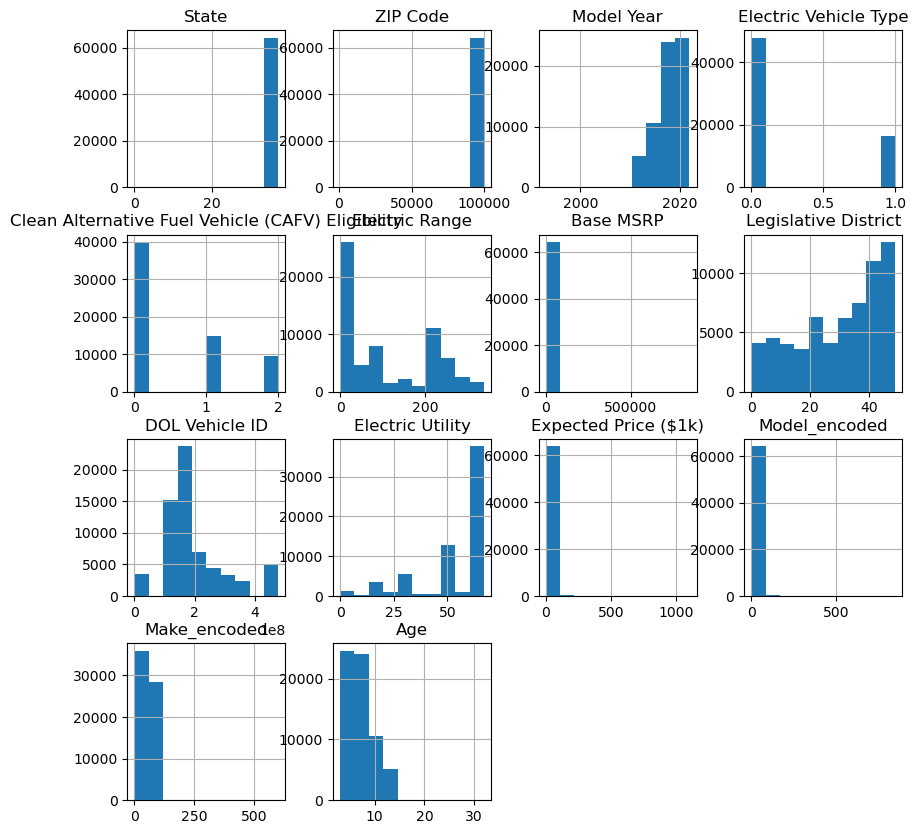

In [16]:
df.hist(figsize = (10,10));

In [17]:
df.corr(numeric_only = True)["Expected Price ($1k)"]

State                                                0.007077
ZIP Code                                            -0.006139
Model Year                                           0.538380
Electric Vehicle Type                               -0.399171
Clean Alternative Fuel Vehicle (CAFV) Eligibility   -0.055128
Electric Range                                       0.214897
Base MSRP                                           -0.081010
Legislative District                                 0.055550
DOL Vehicle ID                                      -0.023218
Electric Utility                                     0.080168
Expected Price ($1k)                                 1.000000
Model_encoded                                        0.894194
Make_encoded                                         0.824151
Age                                                 -0.538380
Name: Expected Price ($1k), dtype: float64

In [18]:
df.columns

Index(['ID', 'VIN (1-10)', 'County', 'City', 'State', 'ZIP Code', 'Model Year',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', 'Expected Price ($1k)',
       'Model_encoded', 'Make_encoded', 'Age'],
      dtype='object')

In [19]:
# Defining our independent and dependent variables
X = df.drop(columns=["Expected Price ($1k)", "ID","VIN (1-10)","County","City","State","ZIP Code","DOL Vehicle ID","Vehicle Location", "Legislative District"])
y = df["Expected Price ($1k)"]

In [20]:
X_scaler = StandardScaler()
encoded_columns = ['Model_encoded', 'Make_encoded',"Electric Utility", "Clean Alternative Fuel Vehicle (CAFV) Eligibility", "Electric Vehicle Type"]
scalable_columns = [col for col in X.columns if col not in encoded_columns]
X[scalable_columns] = X_scaler.fit_transform(X[scalable_columns])


In [21]:
y_scaler = StandardScaler()
y = y_scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

In [22]:
y

array([ 0.18414616, -1.23138869, -1.11005713, ..., -0.91362134,
        0.01023759, -0.42251163])

In [23]:
## splitting our dataset (training and testing)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [25]:
### Defining the parameter grid
model_params = {
    "svm":{
        "model":SVR(gamma = "scale"),
        "params": {"C":[0.1, 1, 5, 10, 30, 100], "kernel":["rbf", "linear", "poly", "sigmoid"], "max_iter": [1,5,10,50,100]}},
        
    "Linear Regression":{
        "model":LinearRegression(),
        "params": {"n_jobs": [1,10,20]}},
    
    "Decision Tree Regressor":{
        "model":DecisionTreeRegressor(),
        "params": {"max_depth": [10,20,50], "min_samples_split": [20,30,40]}
    }
}


In [26]:
from sklearn.model_selection import GridSearchCV
scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp["model"], mp["params"], cv = 5, return_train_score = False)
    clf.fit(X_train,y_train)
    scores.append({
    "model": model_name,
    "best_estimator": clf.best_estimator_,
    "best_params":clf.best_params_,
    "best_score": clf.best_score_

    })
print(scores)

[{'model': 'svm', 'best_estimator': SVR(C=5, max_iter=100), 'best_params': {'C': 5, 'kernel': 'rbf', 'max_iter': 100}, 'best_score': 0.22861788602175165}, {'model': 'Linear Regression', 'best_estimator': LinearRegression(n_jobs=1), 'best_params': {'n_jobs': 1}, 'best_score': 0.8485473454018821}, {'model': 'Decision Tree Regressor', 'best_estimator': DecisionTreeRegressor(max_depth=20, min_samples_split=20), 'best_params': {'max_depth': 20, 'min_samples_split': 20}, 'best_score': 0.9732201999889629}]


Currently the model performing best is Decision Tree. We would fit our model with this.

In [46]:
model = DecisionTreeRegressor(max_depth=20, min_samples_split=20)

In [48]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, min_samples_split=20)

In [49]:
y_pred = model.predict(X_test)

In [50]:
y_pred_original = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()


In [51]:
model.score(X_train,y_train)

0.9978198160312278

In [53]:
y_test_original = y_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()


In [56]:
y_test_original[:10]

array([33.5  , 22.2  , 36.   , 33.89 , 50.   , 30.   , 21.998, 68.   ,
       50.   , 19.   ])

In [57]:
y_pred_original[:10]

array([33.5  , 22.2  , 36.   , 33.89 , 50.   , 30.   , 21.998, 68.   ,
       50.   , 19.   ])

In [54]:
r2 = r2_score(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = np.sqrt(mse)

print(f"R^2 Score: {r2}")
print(f"RMSE: {rmse}")

R^2 Score: 0.8572617863769026
RMSE: 9.692414067321483


Accuracy score of 85.7% when training with 80% dataset. This model performs well above average.